In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.naive_bayes import GaussianNB #정규분포 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델


from sklearn import preprocessing
from sklearn.model_selection import train_test_split #데이터 한줄로 나누기 
from sklearn import metrics
from sklearn.metrics import classification_report

#로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression 
import statsmodels.api as sm 


from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

#xgboost
import xgboost as xgb
from xgboost import plot_importance

# Random forest 하이퍼 파라미터 튜닝 
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

# 카이제곱 
import scipy.stats as stats 
from scipy.stats import chi2

#RANDOM FOREST 
from sklearn.ensemble import RandomForestClassifier

import datetime
from datetime import datetime, date

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',10)
pd.set_option('display.width',80)

import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
df_in = pd.read_excel('../data/Dsms_person_info_date.xlsx') ## 13000 / 33000

In [159]:
df_in

       OM_NO OM_NM  HMRE_TP_CD  SDT_DV_CD  DSMS_YN    ET_YM  DSMS_YM  \
0          0   정*진         116          2        1  2017-07  2018-09   
1          1   김*희         116          2        1  2014-09  2016-06   
2          2   최*숙         116          2        0  2020-07  9999-12   
3          3   김*숙         116          2        1  2017-08  2018-05   
4          4   이*훈         116          1        1  2020-11  2020-11   
...      ...   ...         ...        ...      ...      ...      ...   
46528  46528   강*채         116          2        0  2020-06  9999-12   
46529  46529   최*형         116          2        1  2018-03  2018-05   
46530  46530   최*선         116          2        1  2019-03  2019-05   
46531  46531   이*숙         116          2        1  2018-05  2019-11   
46532  46532   현*복         116          1        1  2016-12  2019-10   

       DSMS_YYYY COT_SCPS_CD  JANG_YN  DISMISS_AGE  COT_ET_EMNM  MARRY_YN  \
0           2018         ZZZ        0           46        

In [160]:
df_in.set_index(['OM_NO'],inplace=True) # 사원번호 index 설정 

In [161]:
df_in.columns # 컬럼명 출력 

Index(['OM_NM', 'HMRE_TP_CD', 'SDT_DV_CD', 'DSMS_YN', 'ET_YM', 'DSMS_YM',
       'DSMS_YYYY', 'COT_SCPS_CD', 'JANG_YN', 'DISMISS_AGE', 'COT_ET_EMNM',
       'MARRY_YN', 'INCM_AMT_3', 'INCM_AVG_3', 'INCM_AMT_6', 'INCM_AVG_6',
       'SIN_CNT_3', 'SIN_AVG_3', 'SIN_CNT_6', 'SIN_AVG_6', 'HLD_CNR_NCN',
       'HLD_CNOR_CNT', 'INCM_AMT_1', 'SIN_CNT_1', 'AM_LGIN_CNT_1',
       'AM_LGIN_CNT_AVG', 'PPM_LGIN_CNT_1', 'PPM_LGIN_CNT_AVG', 'CHIL_CNT',
       'HUS_CNT', 'HUS_INCM_AMT', 'CHIL_YONG_CNT', 'BOSS_NO', 'LIV_MINE',
       'CHN_CD', 'ELEC_SB_NCN_1', 'MBL_ELEC_SB_NCN_1', 'YUJIYUL_27',
       'GNR_VST_TGT_CNT', 'GNR_VST_CNT', 'RECUR_CNT'],
      dtype='object')

In [162]:
df_in[df_in.DSMS_YN == 1].describe()

       HMRE_TP_CD     SDT_DV_CD  DSMS_YN     DSMS_YYYY       JANG_YN  \
count     33066.0  33066.000000  33066.0  33066.000000  33066.000000   
mean        116.0      1.896843      1.0   2018.181213      0.007561   
std           0.0      0.304169      0.0      1.447923      0.086624   
min         116.0      1.000000      1.0   2016.000000      0.000000   
25%         116.0      2.000000      1.0   2017.000000      0.000000   
50%         116.0      2.000000      1.0   2018.000000      0.000000   
75%         116.0      2.000000      1.0   2019.000000      0.000000   
max         116.0      2.000000      1.0   2021.000000      1.000000   

        DISMISS_AGE   COT_ET_EMNM     MARRY_YN    INCM_AMT_3    INCM_AVG_3  \
count  33066.000000  33066.000000  33066.00000  3.306600e+04  3.306600e+04   
mean      45.636848     31.576907      0.34159  1.462333e+06  4.874445e+05   
std        8.587366     50.373062      0.47425  2.319648e+06  7.732159e+05   
min       19.000000      1.000000      

In [163]:
df_in[df_in.DSMS_YN == 0].describe()

       HMRE_TP_CD     SDT_DV_CD  DSMS_YN  DSMS_YYYY       JANG_YN  \
count     13467.0  13467.000000  13467.0    13467.0  13467.000000   
mean        116.0      1.934210      0.0     9999.0      0.038093   
std           0.0      0.271924      0.0        0.0      0.191428   
min         116.0      1.000000      0.0     9999.0      0.000000   
25%         116.0      2.000000      0.0     9999.0      0.000000   
50%         116.0      2.000000      0.0     9999.0      0.000000   
75%         116.0      2.000000      0.0     9999.0      0.000000   
max         116.0      9.000000      0.0     9999.0      1.000000   

        DISMISS_AGE   COT_ET_EMNM     MARRY_YN    INCM_AMT_3    INCM_AVG_3  \
count  13467.000000  13467.000000  13467.00000  1.346700e+04  1.346700e+04   
mean      50.703943     99.247717      0.49380  8.689888e+06  2.896629e+06   
std        8.934040    112.148076      0.49998  9.231934e+06  3.077311e+06   
min       20.000000      1.000000      0.00000  0.000000e+00  0.00

<AxesSubplot:xlabel='DSMS_YN', ylabel='INCM_AMT_1'>

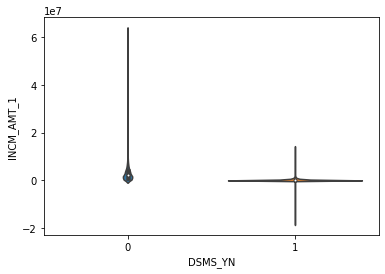

In [164]:
# 해촉여부 / 전월 수입 
sns.violinplot(data=df_in,x = 'DSMS_YN', y = 'INCM_AMT_1')

<AxesSubplot:xlabel='DSMS_YN', ylabel='AM_LGIN_CNT_1'>

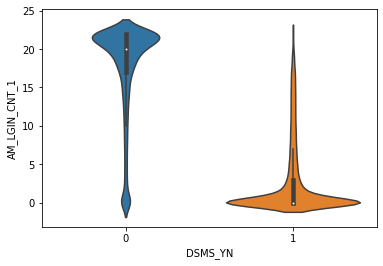

In [165]:
# 해촉 여부 / 오전출근일수 
sns.violinplot(data=df_in,x = 'DSMS_YN', y = 'AM_LGIN_CNT_1')

<AxesSubplot:xlabel='DSMS_YN', ylabel='PPM_LGIN_CNT_1'>

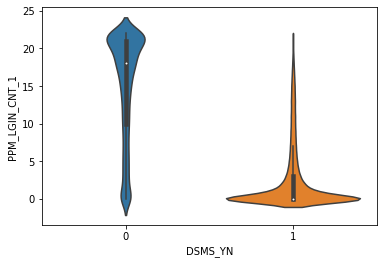

In [166]:
# 해촉여부 / 오후 출근 일수 
sns.violinplot(data=df_in,x = 'DSMS_YN', y = 'PPM_LGIN_CNT_1')

<AxesSubplot:xlabel='DSMS_YN', ylabel='COT_ET_EMNM'>

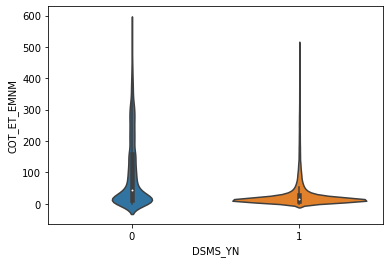

In [167]:
# 해촉여부 / 위촉차월수 
sns.violinplot(data=df_in,x = 'DSMS_YN', y = 'COT_ET_EMNM')

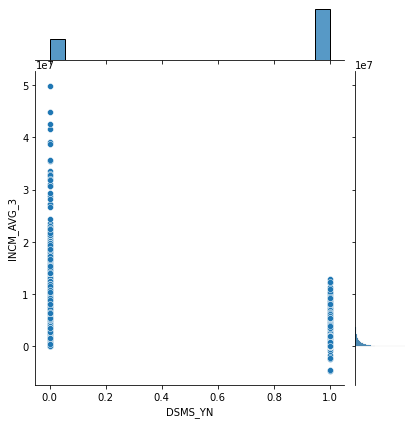

In [168]:
# 해촉여부 / 3개월 평균 수입 
sns.jointplot(data=df_in,x = 'DSMS_YN', y = 'INCM_AVG_3')

In [169]:
df_in['DSMS_YN']

OM_NO
0        1
1        1
2        0
3        1
4        1
        ..
46528    0
46529    1
46530    1
46531    1
46532    1
Name: DSMS_YN, Length: 46533, dtype: int64

In [170]:
df_in_cp = df_in[['SIN_CNT_1','DSMS_YN','INCM_AMT_1','AM_LGIN_CNT_1'
                  ,'COT_ET_EMNM','PPM_LGIN_CNT_1','GNR_VST_CNT','YUJIYUL_27','ELEC_SB_NCN_1']]

In [171]:
df_in_cp

       SIN_CNT_1  DSMS_YN  INCM_AMT_1  AM_LGIN_CNT_1  COT_ET_EMNM  \
OM_NO                                                               
0              0        1           0              1           15   
1              0        1      654410              0           22   
2              2        0     1457910             22           10   
3              0        1           0              0           10   
4              0        1           0              0            1   
...          ...      ...         ...            ...          ...   
46528          1        0      190695             21           11   
46529          0        1        3024              0            3   
46530          0        1       38642             15            3   
46531          0        1      336467             16           19   
46532          0        1           0              7           35   

       PPM_LGIN_CNT_1  GNR_VST_CNT  YUJIYUL_27  ELEC_SB_NCN_1  
OM_NO                                 

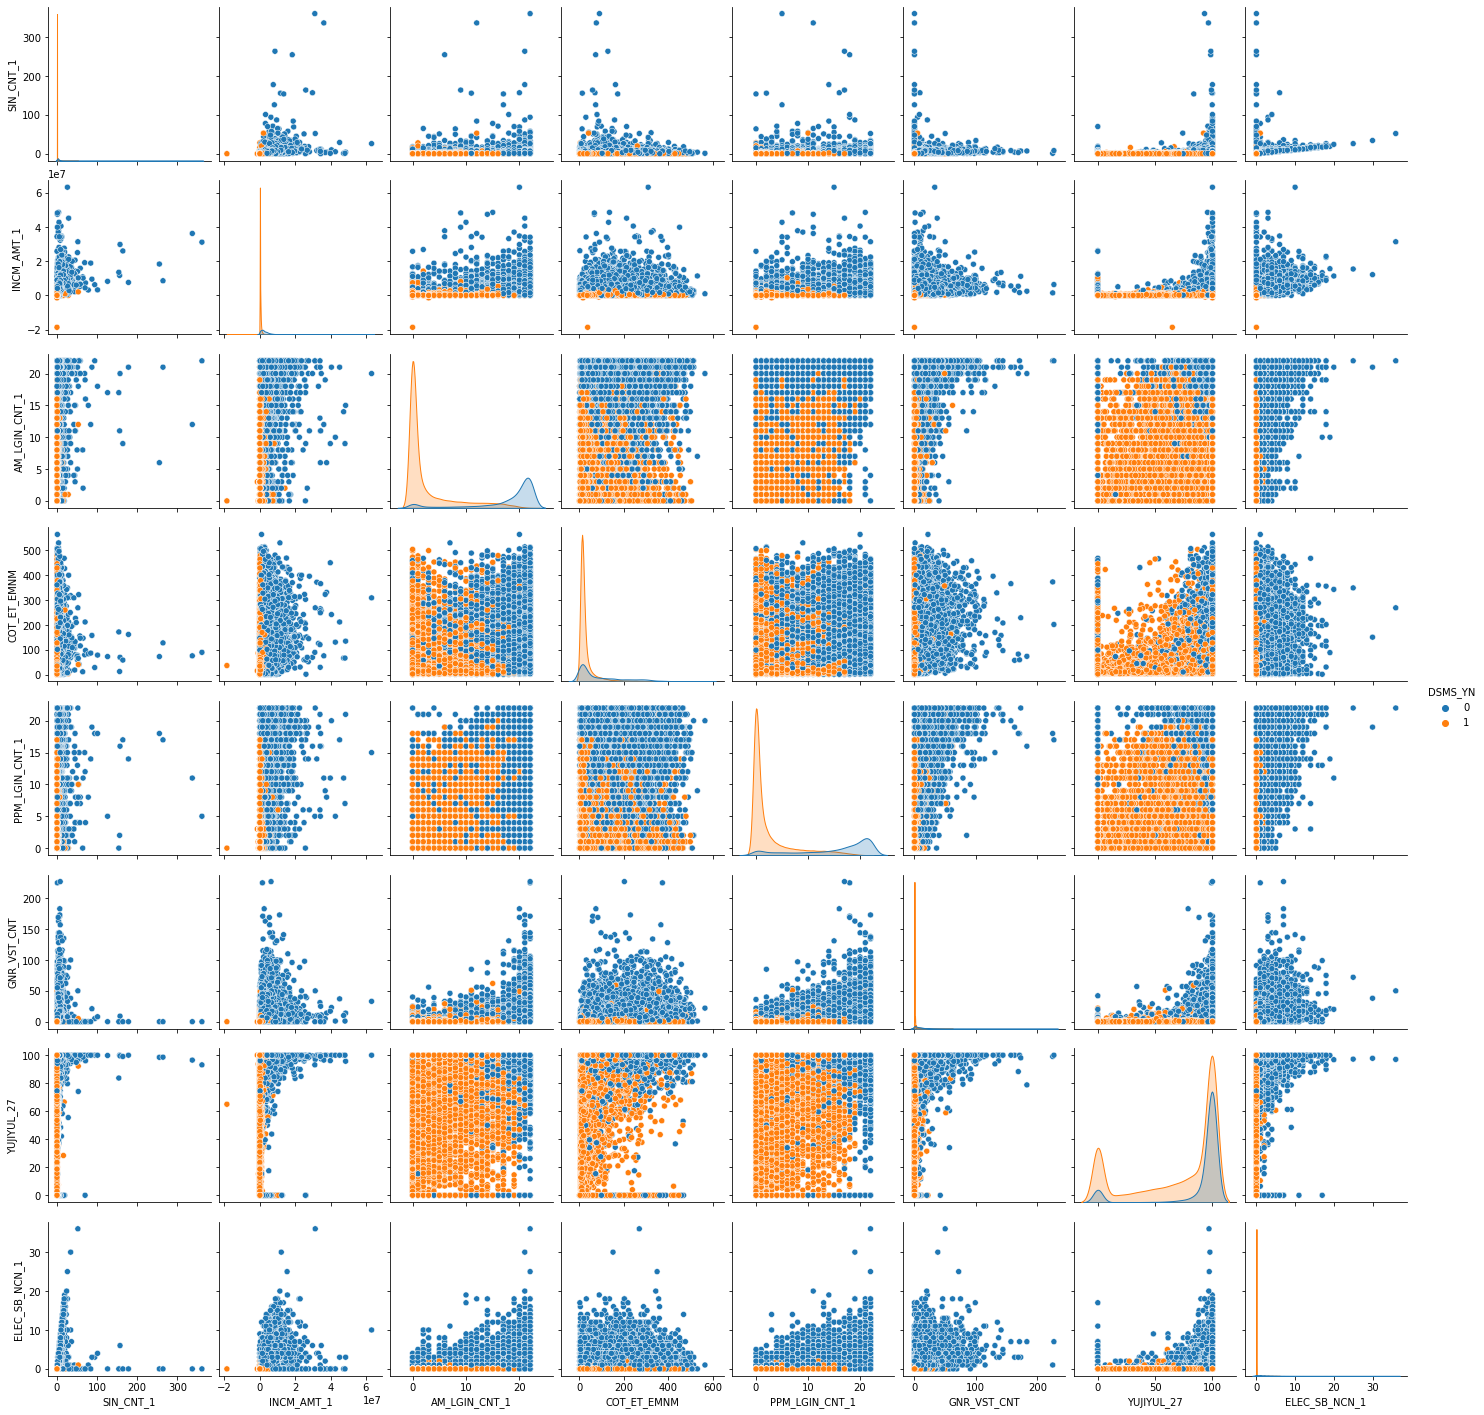

In [172]:
sns.pairplot(df_in_cp, hue='DSMS_YN') # 1:해촉 0:위촉 

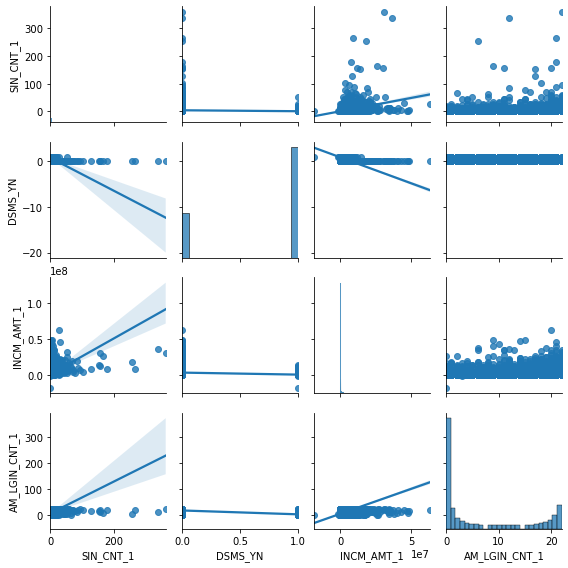

In [173]:
df_in_cp1 = df_in[['SIN_CNT_1','DSMS_YN','INCM_AMT_1','AM_LGIN_CNT_1']]

sns.pairplot(df_in_cp1 ,  kind='reg', height=2)

In [174]:
# 점이연상관관계 
column_customed = {'DISMISS_AGE', 'COT_ET_EMNM',
       'MARRY_YN',  
       'HLD_CNR_NCN',
       'HLD_CNOR_CNT', 'INCM_AMT_1', 'SIN_CNT_1', 'AM_LGIN_CNT_1',
       'PPM_LGIN_CNT_1',  'CHIL_CNT',
       'HUS_INCM_AMT', 'CHIL_YONG_CNT', 'LIV_MINE',
        'YUJIYUL_27',
       'GNR_VST_TGT_CNT', 'GNR_VST_CNT', 'RECUR_CNT'
        ,'ELEC_SB_NCN_1','MBL_ELEC_SB_NCN_1'}
df_in_1 = df_in[column_customed]
df_in_1.columns

Index(['LIV_MINE', 'HLD_CNOR_CNT', 'HLD_CNR_NCN', 'MBL_ELEC_SB_NCN_1',
       'DISMISS_AGE', 'ELEC_SB_NCN_1', 'CHIL_YONG_CNT', 'RECUR_CNT',
       'PPM_LGIN_CNT_1', 'CHIL_CNT', 'MARRY_YN', 'AM_LGIN_CNT_1', 'SIN_CNT_1',
       'GNR_VST_CNT', 'GNR_VST_TGT_CNT', 'COT_ET_EMNM', 'INCM_AMT_1',
       'YUJIYUL_27', 'HUS_INCM_AMT'],
      dtype='object')

In [175]:
cor_i = []
pval_i = []
col_i = []

for i in df_in_1.columns :
    cor,pval = stats.pointbiserialr(df_in_1[i],df_in.DSMS_YN )
    cor_i.append(cor)  
    pval_i.append(pval)
    col_i.append(i)
corr = pd.DataFrame({'Columns':col_i,'cor':cor_i,'pval':pval_i})

print(corr)  


              Columns       cor          pval
0            LIV_MINE -0.074379  4.386481e-58
1        HLD_CNOR_CNT -0.356393  0.000000e+00
2         HLD_CNR_NCN -0.395878  0.000000e+00
3   MBL_ELEC_SB_NCN_1 -0.198404  0.000000e+00
4         DISMISS_AGE -0.255669  0.000000e+00
..                ...       ...           ...
14    GNR_VST_TGT_CNT -0.427067  0.000000e+00
15        COT_ET_EMNM -0.384065  0.000000e+00
16         INCM_AMT_1 -0.562555  0.000000e+00
17         YUJIYUL_27 -0.240739  0.000000e+00
18       HUS_INCM_AMT -0.008810  5.737749e-02

[19 rows x 3 columns]


In [176]:
#randon forest 95.29 % HLD_CNR_NCN # 95.16
# x : 신계약건수, 해촉시점 나이, 위촉차월 , 전월수입, 오전출근일수, 오후귀사일수, 결혼여부
# 3개월평균신계약건수, 3개월평균수입, 유지계약건수, 유지계약 고객수, 미성년자녀수, 배우자소득 
#  평생든든 방문수 , 2~7회차 통사 유지율 , 리크루팅인원, 전자청약건수 
# y :  해촉여부 
x = df_in[['SIN_CNT_1', 'DISMISS_AGE', 'COT_ET_EMNM', 'INCM_AMT_1','AM_LGIN_CNT_1','PPM_LGIN_CNT_1','MARRY_YN',
          'SIN_AVG_3','INCM_AVG_3','HLD_CNR_NCN','HLD_CNOR_CNT','CHIL_YONG_CNT','HUS_INCM_AMT'
          ,'GNR_VST_CNT','YUJIYUL_27','RECUR_CNT','ELEC_SB_NCN_1']]
y = df_in['DSMS_YN']

In [177]:
# 테스트 데이터 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

37226
9307
37226
9307


In [178]:
# 학습 진행 샘플개수 300 
forest = RandomForestClassifier(n_estimators=300)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [179]:
y_pred = forest.predict(x_test)

In [180]:
# Random forest  정확도
print('정확도 :', metrics.accuracy_score(y_test, y_pred))
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,y_pred)))

정확도 : 0.9614268829912969
예측 정확도: 0.9614


In [181]:
# 랜덤 포레스트 최적의 파라미터 찾기 (하이퍼 파라미터 튜닝)
params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.9594


In [182]:
rf_clf1 = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 12,
                                min_samples_leaf = 8,
                                min_samples_split = 20,
                                random_state = 0,
                                n_jobs = -1)
rf_clf1.fit(x_train, y_train)
pred = rf_clf1.predict(x_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))
print('정확도 :', metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, forest.predict(x_test)))

예측 정확도: 0.9596
정확도 : 0.9614268829912969
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2718
           1       0.96      0.99      0.97      6589

    accuracy                           0.96      9307
   macro avg       0.96      0.94      0.95      9307
weighted avg       0.96      0.96      0.96      9307



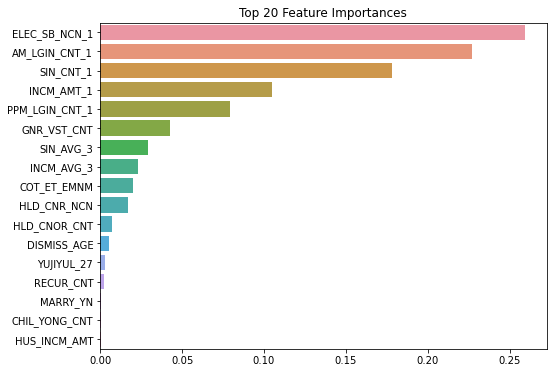

In [183]:
# 각 피처의 중요도 시각화 
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [184]:
# xg boost 
dtrain = xgb.DMatrix(data = x_train, label = y_train )
dtest = xgb.DMatrix(data = x_test, label = y_test )

In [185]:
dtest

In [186]:
# 부스터 파라미터 
params = {
    'max_depth' : 3,
    'eta' : 0.001,
    'objectve' : 'binary:logistic',
    'eval_metric':'logloss',
    'early_stoppings' : 100
}

In [187]:
# 부스반복회수 
num_rounds = 400

In [188]:
wlist = [(dtrain,'train'),(dtest,'eval')]

In [189]:
xgb_model = xgb.train(params = params, early_stopping_rounds = 100, dtrain = dtrain , num_boost_round = num_rounds, evals = wlist )

[22:18:25] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stoppings, objectve } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69231	eval-logloss:0.69234
[1]	train-logloss:0.69154	eval-logloss:0.69153
[2]	train-logloss:0.69070	eval-logloss:0.69072
[3]	train-logloss:0.68986	eval-logloss:0.68991
[4]	train-logloss:0.68911	eval-logloss:0.68910
[5]	train-logloss:0.68828	eval-logloss:0.68829
[6]	train-logloss:0.68745	eval-logloss:0.68748
[7]	train-logloss:0.68663	eval-logloss:0.68670
[8]	train-logloss:0.68588	eval-logloss:0.68589
[9]	train-logloss:0.68503	eval-logloss:0.68509
[10]	train-logloss:0.68421	eval-logloss:0.68430
[11]	train-logloss:0.68347	eval-logloss:0.68350
[12]	train-logloss:0.68263	eval-logloss:0.68270
[13]	train-logloss:0.68181	eval-logloss:0

[163]	train-logloss:0.57787	eval-logloss:0.57866
[164]	train-logloss:0.57727	eval-logloss:0.57807
[165]	train-logloss:0.57671	eval-logloss:0.57747
[166]	train-logloss:0.57611	eval-logloss:0.57688
[167]	train-logloss:0.57549	eval-logloss:0.57629
[168]	train-logloss:0.57486	eval-logloss:0.57569
[169]	train-logloss:0.57426	eval-logloss:0.57510
[170]	train-logloss:0.57371	eval-logloss:0.57451
[171]	train-logloss:0.57311	eval-logloss:0.57392
[172]	train-logloss:0.57248	eval-logloss:0.57333
[173]	train-logloss:0.57188	eval-logloss:0.57274
[174]	train-logloss:0.57133	eval-logloss:0.57215
[175]	train-logloss:0.57073	eval-logloss:0.57157
[176]	train-logloss:0.57010	eval-logloss:0.57098
[177]	train-logloss:0.56951	eval-logloss:0.57040
[178]	train-logloss:0.56898	eval-logloss:0.56981
[179]	train-logloss:0.56836	eval-logloss:0.56923
[180]	train-logloss:0.56778	eval-logloss:0.56865
[181]	train-logloss:0.56722	eval-logloss:0.56806
[182]	train-logloss:0.56663	eval-logloss:0.56750
[183]	train-logloss:

[331]	train-logloss:0.48978	eval-logloss:0.49133
[332]	train-logloss:0.48934	eval-logloss:0.49087
[333]	train-logloss:0.48888	eval-logloss:0.49043
[334]	train-logloss:0.48843	eval-logloss:0.48997
[335]	train-logloss:0.48794	eval-logloss:0.48952
[336]	train-logloss:0.48751	eval-logloss:0.48907
[337]	train-logloss:0.48705	eval-logloss:0.48863
[338]	train-logloss:0.48660	eval-logloss:0.48817
[339]	train-logloss:0.48616	eval-logloss:0.48773
[340]	train-logloss:0.48573	eval-logloss:0.48728
[341]	train-logloss:0.48527	eval-logloss:0.48685
[342]	train-logloss:0.48482	eval-logloss:0.48639
[343]	train-logloss:0.48434	eval-logloss:0.48596
[344]	train-logloss:0.48390	eval-logloss:0.48550
[345]	train-logloss:0.48347	eval-logloss:0.48506
[346]	train-logloss:0.48300	eval-logloss:0.48463
[347]	train-logloss:0.48256	eval-logloss:0.48418
[348]	train-logloss:0.48214	eval-logloss:0.48374
[349]	train-logloss:0.48170	eval-logloss:0.48331
[350]	train-logloss:0.48126	eval-logloss:0.48286
[351]	train-logloss:

In [190]:
pred_probs = xgb_model.predict(dtest)

In [191]:
print(np.round(pred_probs[:10],3))

[0.651 0.337 0.337 0.651 0.651 0.651 0.651 0.337 0.337 0.651]


In [192]:
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

예측값 10개만 표시:  [1, 0, 0, 1, 1, 1, 1, 0, 0, 1]


In [193]:
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [194]:
get_clf_eval(y_test, preds)

오차행렬:
 [[2347  371]
 [ 109 6480]]

정확도: 0.9484
정밀도: 0.9458
재현율: 0.9835
F1: 0.9643
AUC: 0.9235


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

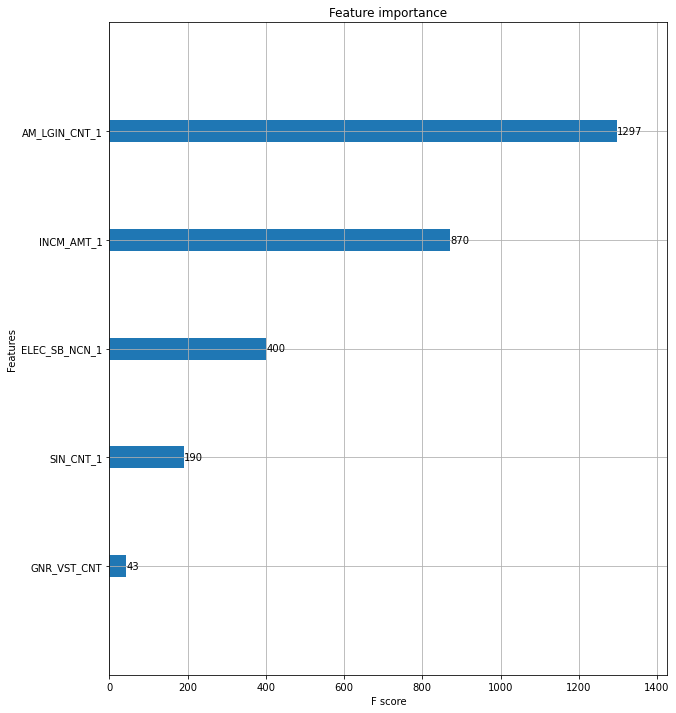

In [195]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

In [196]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(x_test, y_test)]
xgb_wrapper.fit(x_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(x_test)
ws100_pred_proba = xgb_wrapper.predict_proba(x_test)

[0]	validation_0-logloss:0.61591
[1]	validation_0-logloss:0.55273
[2]	validation_0-logloss:0.50020
[3]	validation_0-logloss:0.45583
[4]	validation_0-logloss:0.41845
[5]	validation_0-logloss:0.38531
[6]	validation_0-logloss:0.35749
[7]	validation_0-logloss:0.33282
[8]	validation_0-logloss:0.31160
[9]	validation_0-logloss:0.29279
[10]	validation_0-logloss:0.27669
[11]	validation_0-logloss:0.26230
[12]	validation_0-logloss:0.24989
[13]	validation_0-logloss:0.23844
[14]	validation_0-logloss:0.22875
[15]	validation_0-logloss:0.21988
[16]	validation_0-logloss:0.21184
[17]	validation_0-logloss:0.20491
[18]	validation_0-logloss:0.19879
[19]	validation_0-logloss:0.19301
[20]	validation_0-logloss:0.18820
[21]	validation_0-logloss:0.18337
[22]	validation_0-logloss:0.17940
[23]	validation_0-logloss:0.17598
[24]	validation_0-logloss:0.17224
[25]	validation_0-logloss:0.16905
[26]	validation_0-logloss:0.16658
[27]	validation_0-logloss:0.16401
[28]	validation_0-logloss:0.16194
[29]	validation_0-loglos

[238]	validation_0-logloss:0.12620
[239]	validation_0-logloss:0.12620
[240]	validation_0-logloss:0.12622
[241]	validation_0-logloss:0.12623
[242]	validation_0-logloss:0.12614
[243]	validation_0-logloss:0.12605
[244]	validation_0-logloss:0.12608
[245]	validation_0-logloss:0.12604
[246]	validation_0-logloss:0.12604
[247]	validation_0-logloss:0.12603
[248]	validation_0-logloss:0.12602
[249]	validation_0-logloss:0.12599
[250]	validation_0-logloss:0.12602
[251]	validation_0-logloss:0.12600
[252]	validation_0-logloss:0.12599
[253]	validation_0-logloss:0.12603
[254]	validation_0-logloss:0.12600
[255]	validation_0-logloss:0.12595
[256]	validation_0-logloss:0.12591
[257]	validation_0-logloss:0.12587
[258]	validation_0-logloss:0.12582
[259]	validation_0-logloss:0.12579
[260]	validation_0-logloss:0.12572
[261]	validation_0-logloss:0.12571
[262]	validation_0-logloss:0.12570
[263]	validation_0-logloss:0.12565
[264]	validation_0-logloss:0.12561
[265]	validation_0-logloss:0.12565
[266]	validation_0-l

In [197]:
get_clf_eval(y_test, preds)

오차행렬:
 [[2347  371]
 [ 109 6480]]

정확도: 0.9484
정밀도: 0.9458
재현율: 0.9835
F1: 0.9643
AUC: 0.9235


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

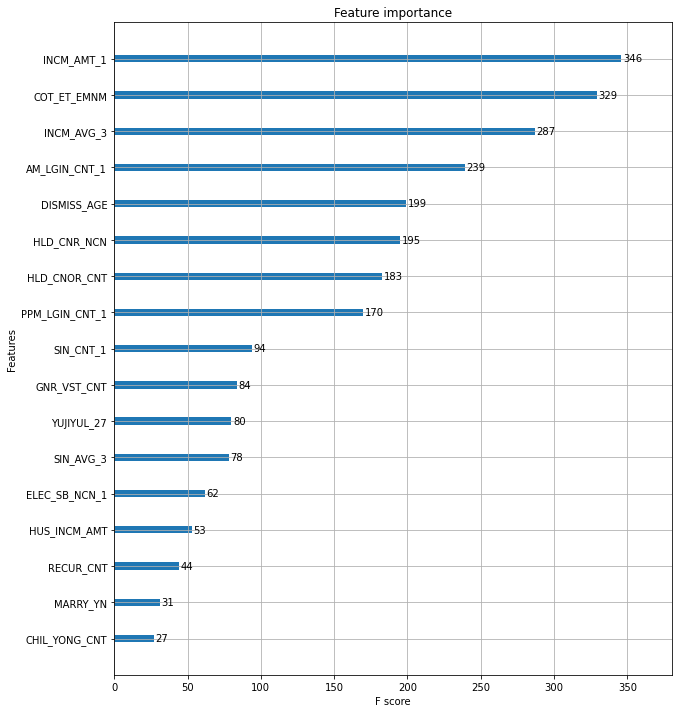

In [198]:
fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)

In [200]:
model_lo = LogisticRegression()
model_lo.fit(x_train, y_train)
prediction = model_lo.predict(x_test)

print(classification_report(y_test, model_lo.predict(x_test)))

              precision    recall  f1-score   support

           0       0.48      0.83      0.61      2718
           1       0.90      0.63      0.74      6589

    accuracy                           0.69      9307
   macro avg       0.69      0.73      0.67      9307
weighted avg       0.78      0.69      0.70      9307



In [201]:
#  다항 로지스틱 회귀(종속변수의 범주수가 3개 이상일경우)
# 최적화에 사용할 알고리즘 newton-cg 사용 
# c는 규칙 강도의 역수값 높은 c이면 낮은 강도의 제약조건. 낮은 c이면 높은 강도 
model = LogisticRegression(C=10,solver='newton-cg').fit(x_train, y_train) #  lbfgs
print( model )

# 테스트셋 예측
predicted = model.predict(x_test)
import pandas as pd
print( pd.crosstab(predicted, y_test) )


LogisticRegression(C=10, solver='newton-cg')
DSMS_YN     0     1
row_0              
0        2279   214
1         439  6375


In [202]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      2718
           1       0.94      0.97      0.95      6589

    accuracy                           0.93      9307
   macro avg       0.92      0.90      0.91      9307
weighted avg       0.93      0.93      0.93      9307



In [203]:
#2021.05 실 해촉 data 
#xg boost 모델 학습하여 결과확인
df_in_05 = pd.read_excel('../data/dsms_202105.xlsx') ## 2021.05해촉 data
x_05 = df_in_05[['SIN_CNT_1', 'DISMISS_AGE', 'COT_ET_EMNM', 'INCM_AMT_1','AM_LGIN_CNT_1','PPM_LGIN_CNT_1','MARRY_YN',
          'SIN_AVG_3','INCM_AVG_3','HLD_CNR_NCN','HLD_CNOR_CNT','CHIL_YONG_CNT','HUS_INCM_AMT'
          ,'GNR_VST_CNT','YUJIYUL_27','RECUR_CNT','ELEC_SB_NCN_1']]
y_05 = df_in_05['DSMS_YN']

In [204]:
# 424명의 실제 해촉 
df_in_05.count()

OM_NO                424
OM_NM                424
HMRE_TP_CD           424
SDT_DV_CD            424
DSMS_YN              424
                    ... 
MBL_ELEC_SB_NCN_1    424
YUJIYUL_27           424
GNR_VST_TGT_CNT      424
GNR_VST_CNT          424
RECUR_CNT            424
Length: 42, dtype: int64

In [205]:
dtest_05 = xgb.DMatrix(data = x_05, label = y_05 )
pred_probs_05 = xgb_model.predict(dtest_05)

In [206]:
print(len(x_05))
print(len(y_05))

424
424


In [207]:
preds_05 = [ 1 if x > 0.5 else 0 for x in pred_probs_05]
print('예측값 10개만 표시: ', preds_05[:10])

예측값 10개만 표시:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [210]:
filteredList = list(filter(lambda x: x%2==0, preds_05))

In [211]:
print(len(filteredList))

30


In [212]:
filteredList1 = list(filter(lambda x: x%2==1, preds_05))
print(len(filteredList1))

394


In [224]:
accuracy = accuracy_score(y_05, preds_05)
precision = precision_score(y_05, preds_05)
recall = recall_score(y_05, preds_05)
F1 = f1_score(y_05, preds_05)

In [234]:
print("accuracy : ", accuracy)
print("precision : ", precision)
print("recall : ", recall)
print("F1 : ", F1)

accuracy :  0.9292452830188679
precision :  1.0
recall :  0.9292452830188679
F1 :  0.9633251833740831
